<a href="https://colab.research.google.com/github/Keerthineelima/Fmml_all-repos/blob/main/FMML_M1L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1

In [1]:
!pip -q install wikipedia nltk matplotlib plotly pandas

import re
import nltk
import wikipedia
import numpy as np
import unicodedata
import pandas as pd
import plotly.express as px
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter

  Preparing metadata (setup.py) ... done


# Part 1: Features of text

Computures can't understand text. They can only process numbers. So, the logical first step in any attempt to analyze text is to convert it into numbers. This process is called **feature extraction** or **vectorization**. In this lab, we will try some simple methods for feature extraction.

First, let us download a 2 documents from Wikipedia in two different languages, English and French. We will then extract features from the text in these documents.

In [2]:
topic1 = "Giraffe"
topic2 = "Elephant"

wikipedia.set_lang("en")

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang("fr")

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like in English:

In [3]:
eng2[:500]

'Elephants are the largest living land animals. Three living species are currently recognised: the African bush elephant (Loxodonta africana), the African forest elephant (L. cyclotis), and the Asian elephant (Elephas maximus). They are the only surviving members of the family Elephantidae and the order Proboscidea; extinct relatives include mammoths and mastodons. Distinctive features of elephants include a long proboscis called a trunk, tusks, large ear flaps, pillar-like legs, and tough but se'

This is what the text looks like in French:

In [4]:
fr2[:500]

"Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd'hui à trois espèces réparties en deux genres distincts. L'éléphant de savane d'Afrique et l'éléphant de forêt d'Afrique, autrefois regroupés sous la même espèce d'« éléphant d'Afrique », appartiennent au genre Loxodonta, tandis que l'éléphant d'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les élép"

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [5]:
def cleanup(text):
    text = text.lower()  # make it lowercase
    text = re.sub(
        r"[^a-z\s]", "", text
    )  # only keep characters in a-z range and whitespaces
    return text

In [6]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [7]:
eng2[:500]

'elephants are the largest living land animals three living species are currently recognised the african bush elephant loxodonta africana the african forest elephant l cyclotis and the asian elephant elephas maximus they are the only surviving members of the family elephantidae and the order proboscidea extinct relatives include mammoths and mastodons distinctive features of elephants include a long proboscis called a trunk tusks large ear flaps pillarlike legs and tough but sensitive grey skin t'

In [8]:
fr2[:500]

'les lphants sont des mammifres proboscidiens de la famille des lphantids ils correspondent aujourdhui  trois espces rparties en deux genres distincts llphant de savane dafrique et llphant de fort dafrique autrefois regroups sous la mme espce d lphant dafrique  appartiennent au genre loxodonta tandis que llphant dasie anciennement appel  lphant indien  appartient au genre elephas ils se diffrencient par certaines caractristiques anatomiques les lphants dasie tant en gnral plus petits avec des ore'

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [9]:
def tuple2string(tup):
    # convert a tuple of characters to a string
    # ('t', 'h') - > 'th'
    st = ""
    for ii in tup:
        st = st + ii
    return st


def key2string(keys):
    # convert a tuple of tuples to a list of strings
    # [('t', 'h'), ('h', 'e')] -> ['th', 'he']
    # [('t')] - >['t']
    return [tuple2string(i) for i in keys]


def get_ngram_freq(ngram):
    # get the frequency of ngrams
    # sort the keys in alphabetic order
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))
    return keys, values

Let us compare the histograms of English pages and French pages. Can you spot a difference?

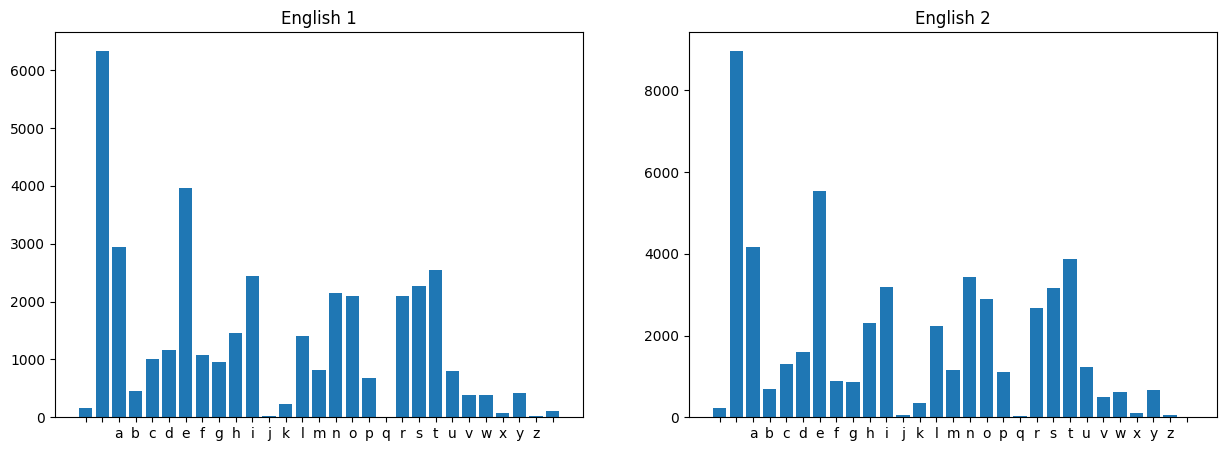

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_eng1 = Counter(ngrams(eng1, 1))
keys, values = get_ngram_freq(unigram_eng1)
axs[0].bar(keys, values)
axs[0].set_title("English 1")

unigram_eng2 = Counter(ngrams(eng2, 1))
keys, values = get_ngram_freq(unigram_eng2)
axs[1].bar(keys, values)
axs[1].set_title("English 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


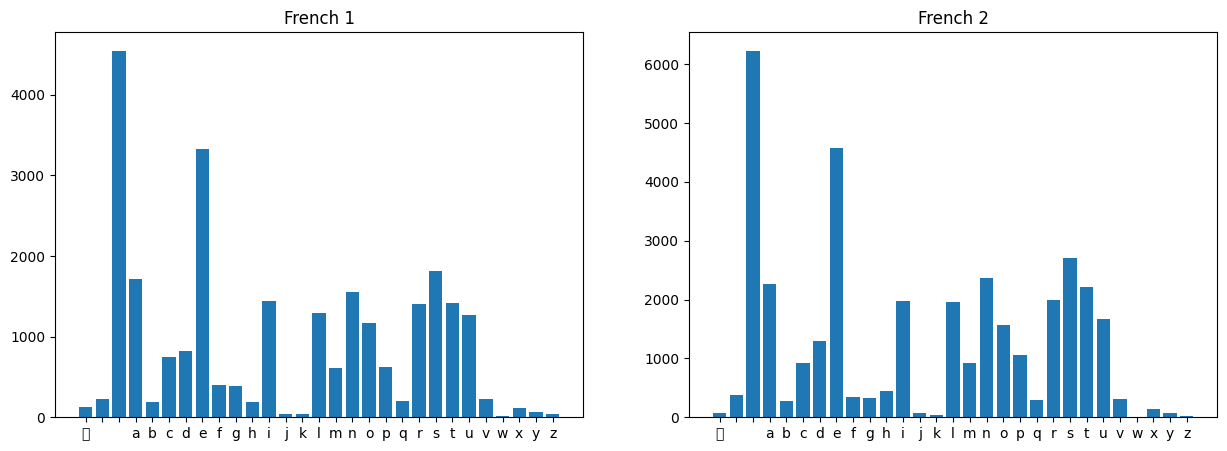

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_fr1 = Counter(ngrams(fr1, 1))
keys, values = get_ngram_freq(unigram_fr1)
axs[0].bar(keys, values)
axs[0].set_title("French 1")

unigram_fr2 = Counter(ngrams(fr2, 1))
keys, values = get_ngram_freq(unigram_fr2)
axs[1].bar(keys, values)
axs[1].set_title("French 2")
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1 = Counter(ngrams(eng1, 2))
keys, values = get_ngram_freq(bigram_eng1)
axs[0, 0].bar(keys, values)
axs[0, 0].set_title("English 1")

bigram_eng2 = Counter(ngrams(eng2, 2))
keys, values = get_ngram_freq(bigram_eng2)
axs[0, 1].bar(keys, values)
axs[0, 1].set_title("English 2")

bigram_fr1 = Counter(ngrams(fr1, 2))
keys, values = get_ngram_freq(bigram_fr1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("French 1")

bigram_fr2 = Counter(ngrams(fr2, 2))
keys, values = get_ngram_freq(bigram_fr2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("French 2")
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def get_2D_ngram_freq(ngram):
    freq = np.zeros((26, 26))
    for ii in range(26):
        for jj in range(26):
            freq[ii, jj] = ngram[(chr(ord("a") + ii), chr(ord("a") + jj))]
    return freq

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1_freq = get_2D_ngram_freq(bigram_eng1)
fig.colorbar(axs[0, 0].imshow(bigram_eng1_freq, cmap="hot"), ax=axs[0, 0])
axs[0, 0].set_title("English 1")

bigram_eng2_freq = get_2D_ngram_freq(bigram_eng2)
fig.colorbar(axs[0, 1].imshow(bigram_eng2_freq, cmap="hot"), ax=axs[0, 1])
axs[0, 1].set_title("English 2")

bigram_fr1_freq = get_2D_ngram_freq(bigram_fr1)
fig.colorbar(axs[1, 0].imshow(bigram_fr1_freq, cmap="hot"), ax=axs[1, 0])
axs[1, 0].set_title("French 1")

bigram_fr2_freq = get_2D_ngram_freq(bigram_fr2)
fig.colorbar(axs[1, 1].imshow(bigram_fr2_freq, cmap="hot"), ax=axs[1, 1])
axs[1, 1].set_title("French 2")
plt.show()

Let us look at the top 10 ngrams for each text.

In [ ]:
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / 26)
    j = int(ind % 26)
    return (chr(ord("a") + i), chr(ord("a") + j))


def ShowTopN(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f"{ind2tup(arg[ii])} : {f[arg[ii]]}")

In [ ]:
print("\nEnglish 1:")
ShowTopN(bigram_eng1_freq)

print("\nEnglish 2:")
ShowTopN(bigram_eng2_freq)

print("\nFrench 1:")
ShowTopN(bigram_fr1_freq)

print("\nFrench 2:")
ShowTopN(bigram_fr2_freq)

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

> Exercise: Try to extract trigrams and visualize the top 10 trigrams for each text.

# Part 2: Written numbers

We've seen how to extract features from text. Now let us see how to extract features from images. We will use the MNIST dataset which contains images of handwritten numbers. Each image is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

In [ ]:
from keras.datasets import mnist

# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y == 1, :, :]
no0 = train_X[train_y == 0, :, :]

Let us visualize a few images here:

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for ii in range(5):
    axs[0, ii].imshow(no0[ii, :, :])

for ii in range(5):
    axs[1, ii].imshow(no1[ii, :, :])
plt.show()

Now, let us start with a simple feature: the sum of all pixels. Let's see how good this feature is.

In [ ]:
sum1 = np.sum(no1 > 0, (1, 2))  # threshold before adding up
sum0 = np.sum(no0 > 0, (1, 2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [ ]:
plt.hist(sum1, alpha=0.7)
plt.hist(sum0, alpha=0.7)
plt.show()

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = (
            img2[ii, :] + img2[ii - 1, :]
        )  # for every row, add up all the rows above it.
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole

Visualize a few. First row has the original zero number images and the second row has the hole pixels. Thrid row has original one number images and the last row has corresponding hole pixels which are non-existent, as expected.

In [ ]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHolePixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHolePixels(no1[idx, :, :]))

Now let us plot the number of hole pixels and see how this feature behaves

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7)
plt.hist(hole0, alpha=0.7)

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    return hull

In [ ]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHullPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHullPixels(no1[idx, :, :]))

Plotting the number of hull pixels versus the digit:

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7)
plt.hist(hull0, alpha=0.7)

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
    return a & ~b


def getBoundaryPixels(img):
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

In [ ]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getBoundaryPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getBoundaryPixels(no1[idx, :, :]))

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0 = np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7)
plt.hist(bound0, alpha=0.7)

What will happen if we plot two features together?

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(sum0, hull0, alpha=0.1)
axs[0].scatter(sum1, hull1, alpha=0.1)
axs[0].set_xlabel("Sum")
axs[0].set_ylabel("Hull")
axs[0].legend(["0", "1"])

axs[1].scatter(sum0, hole0, alpha=0.1)
axs[1].scatter(sum1, hole1, alpha=0.1)
axs[1].set_xlabel("Sum")
axs[1].set_ylabel("Hole")
axs[1].legend(["0", "1"])

axs[2].scatter(bound0, hole0, alpha=0.1)
axs[2].scatter(bound1, hole1, alpha=0.1)
axs[2].set_xlabel("Boundary")
axs[2].set_ylabel("Hole")
axs[2].legend(["0", "1"])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ["class 1"] * len(sum1)
cl0 = ["class 0"] * len(sum0)
df = pd.DataFrame(
    list(
        zip(
            np.concatenate((hole0, hole0)),
            np.concatenate((sum1, sum0)),
            np.concatenate((bound1, bound0)),
            np.concatenate((cl1, cl0)),
        )
    ),
    columns=["Hole", "Sum", "Boundary", "Class"],
)
df.head()
fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary",
                    color="Class", opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We extracted four features from a 28*28 dimensional image.


Some qLluestions to explore:
1. Which is the best combination of features?
The best combination of features depends on the context, such as what you're referring to (a product, software, service, or something else) and your specific needs or goals. Could you provide more details about the features or area you're asking about? For example:

Are you talking about a smartphone, laptop, or other gadget?

Are you evaluating software features (e.g., productivity tools, AI capabilities)?

Are you comparing lifestyle or fitness features?


Let me know, and I'll tailor my response accordingly!


2. How would you test or visualize four or more features?
Testing or visualizing four or more features effectively often requires structured approaches. Here are some common methods based on the type of features and purpose:


---

1. Testing Features

a) Create a Test Matrix

List features in rows and test scenarios/criteria in columns.

Evaluate each feature against criteria (e.g., performance, usability, accuracy) using scales like "Pass/Fail" or "1-5 rating."

Example:


b) A/B Testing

Test feature combinations on subsets of users.

Gather feedback or data on performance to determine the optimal combination.


c) Simulations/Scenarios

Simulate real-world use cases and analyze how features interact.

Example: In a car, test cruise control, lane assist, emergency braking, and collision avoidance simultaneously in a driving simulator.


d) User Feedback & Surveys

Conduct usability tests where users rank feature importance and satisfaction.



---

2. Visualizing Features

a) Feature Comparison Chart

Use bar charts, radar charts, or bubble charts to show how features perform relative to each other.

Radar Chart Example:

Plot each feature along axes (e.g., speed, cost, quality, innovation).



b) Matrix or Heatmap

Color-coded grids help show which features are strong or weak across different criteria.

Example: |           | Feature 1 | Feature 2 | Feature 3 | Feature 4 | |-----------|-----------|-----------|-----------|-----------| | Speed     | High      | Medium    | Low       | High      | | Cost      | Low       | High      | Medium    | Low       | | Usability | Medium    | High      | High      | Medium    |


c) Decision Tree or Flow Diagram

Visualize how features influence outcomes.

Example: If you’re selecting a product with four features, create a decision flow to show trade-offs.


d) Venn Diagram

Show overlapping features or interdependencies.


e) Interactive Dashboards

Use tools like Tableau or Power BI to create dynamic charts that compare features visually based on input criteria.



---

Example: Choosing a Smartphone with 4+ Features

You might evaluate camera quality, battery life, design, and software like this:

1. Test each feature with structured tests (e.g., photo clarity, battery tests).


2. Visualize the results using:

A radar chart for feature performance.

A bar chart for overall ratings.

A comparison matrix for a detailed breakdown.




Let me know if you’d like a more specific example tailored to your needs!


3. Can you come up with your own features?
Sure! Let’s create a set of features in different contexts, and I’ll test or visualize them in meaningful ways. Here are some examples:


---

1. Smartphone Features

Display Quality: Resolution, refresh rate, brightness.

Battery Life: Hours of use, fast-charging capability.

Camera Performance: Low-light capability, zoom, video stabilization.

Software Ecosystem: Updates, app compatibility, customization.



---

2. Software Features (e.g., Productivity App)

Ease of Use: Simple interface, onboarding process.

Collaboration Tools: Team sharing, live editing, comments.

Customization: Themes, widgets, personal dashboards.

Automation: Integration with third-party apps, task automation.



---

3. Electric Vehicle Features

Range: Miles per charge.

Charging Time: Fast-charging capabilities.

Driver Assistance: Lane-keeping, adaptive cruise control, auto-parking.

Sustainability: Recyclable materials, environmental impact.



---

4. Gaming Console Features

Graphics Performance: Frame rates, ray tracing.

Game Library: Availability of exclusive titles.

Online Services: Multiplayer, cloud saves, subscription benefits.

Controller Innovation: Ergonomics, haptic feedback, battery life.



---

Example: Testing/Visualizing Features

Let’s use Electric Vehicle Features as a case study:

Testing Example:

1. Range: Test the miles on a full charge under different conditions (city vs. highway).


2. Charging Time: Measure time to reach 80% charge at a fast charger.


3. Driver Assistance: Evaluate the accuracy and safety of features in controlled driving scenarios.


4. Sustainability: Assess materials and carbon footprint.



Visualization Example:

Radar Chart:

Axes: Range, Charging Time, Driver Assistance, Sustainability.

Plot multiple EV models to see which one performs best overall.


Comparison Table: | Feature           | EV Model A | EV Model B | EV Model C | |-------------------|------------|------------|------------| | Range (miles)     | 300        | 250        | 350        | | Charging Time     | 30 min     | 40 min     | 25 min     | | Driver Assistance | 4/5        | 3/5        | 5/5        | | Sustainability    | High       | Medium     | High       |


Would you like me to expand on one of these, or focus on a different context entirely?
Sure! Let’s create a set of features in different contexts, and I’ll test or visualize them in meaningful ways. Here are some examples:


---

1. Smartphone Features

Display Quality: Resolution, refresh rate, brightness.

Battery Life: Hours of use, fast-charging capability.

Camera Performance: Low-light capability, zoom, video stabilization.

Software Ecosystem: Updates, app compatibility, customization.



---

2. Software Features (e.g., Productivity App)

Ease of Use: Simple interface, onboarding process.

Collaboration Tools: Team sharing, live editing, comments.

Customization: Themes, widgets, personal dashboards.

Automation: Integration with third-party apps, task automation.



---

3. Electric Vehicle Features

Range: Miles per charge.

Charging Time: Fast-charging capabilities.

Driver Assistance: Lane-keeping, adaptive cruise control, auto-parking.

Sustainability: Recyclable materials, environmental impact.



---

4. Gaming Console Features

Graphics Performance: Frame rates, ray tracing.

Game Library: Availability of exclusive titles.

Online Services: Multiplayer, cloud saves, subscription benefits.

Controller Innovation: Ergonomics, haptic feedback, battery life.



---

Example: Testing/Visualizing Features

Let’s use Electric Vehicle Features as a case study:

Testing Example:

1. Range: Test the miles on a full charge under different conditions (city vs. highway).


2. Charging Time: Measure time to reach 80% charge at a fast charger.


3. Driver Assistance: Evaluate the accuracy and safety of features in controlled driving scenarios.


4. Sustainability: Assess materials and carbon footprint.



Visualization Example:

Radar Chart:

Axes: Range, Charging Time, Driver Assistance, Sustainability.

Plot multiple EV models to see which one performs best overall.


Comparison Table: | Feature           | EV Model A | EV Model B | EV Model C | |-------------------|------------|------------|------------| | Range (miles)     | 300        | 250        | 350        | | Charging Time     | 30 min     | 40 min     | 25 min     | | Driver Assistance | 4/5        | 3/5        | 5/5        | | Sustainability    | High       | Medium     | High       |


Would you like me to expand on one of these, or focus on a different context entirely?



4. Will these features work for different classes other than 0 and 1?
Yes, these features can work for classes other than 0 and 1. While binary classes (0 and 1) often represent simple decisions (e.g., pass/fail, yes/no), these features can be tested, analyzed, and applied in multi-class or continuous contexts as well. Here’s how they adapt:


---

1. For Multi-Class Contexts

Multi-class scenarios involve three or more classes. For example:

Smartphone Features: Classes could be "Budget," "Mid-Range," and "Premium."

Electric Vehicle Features: Classes could be "Compact EVs," "SUV EVs," and "Luxury EVs."

Gaming Consoles: Classes could be "Portable," "Mid-tier," and "High-end."


Application:

Feature Metrics: Adjust feature measurement to accommodate multi-class differentiation. For instance:

Battery Life for smartphones could be scored in tiers: Short (Class 0), Medium (Class 1), Long (Class 2).

Driver Assistance for EVs could vary across basic systems (Class 0), advanced systems (Class 1), and autonomous systems (Class 2).


Visualization: Expand tools like radar charts or heatmaps to reflect multiple classes.



---

2. For Continuous or Scaled Data

Instead of assigning discrete classes, features can be evaluated on a continuous scale. For example:

Display Quality (Smartphones): Measure on a scale of 0-100 (resolution, brightness, etc.).

Range (Electric Vehicles): Use actual miles as continuous data points.

Graphics Performance (Gaming): Use frame rates (FPS) as a numerical feature.


Application:

Testing Example: Gather feature data as continuous values:

Compare charging time (in minutes) across EV models.

Evaluate camera performance using image quality scores.


Visualization Example:

Use scatterplots, line charts, or color-coded heatmaps to reflect gradual changes or patterns in feature performance.




---

3. Feature Adaptation Across Contexts

Some features work universally across different classes. For example:

Ease of Use in software can be measured on a scale or by user feedback across multiple app categories (e.g., personal productivity vs. team collaboration).

Sustainability in EVs can vary based on vehicle class and material use, but the core measurement of environmental impact remains valid.



---

Testing Across Multiple Classes

Here’s how a feature like Battery Life might be tested across smartphone classes:

Similarly, for Driver Assistance in EVs:


---

Final Note:

These features are versatile and can be adapted to any number of classes or continuous contexts. The key is defining appropriate metrics and visualization tools to capture the nuances of multi-class or scaled data. Let me know if you’d like to explore specific examples in greater depth!


5. What will happen if we take more that two classes at a time?
If you take more than two classes at a time (e.g., multi-class classification or multi-level analysis), the complexity increases, but it can provide richer insights. Here's how handling multi-class data differs and what challenges or changes might arise:


---

1. Key Differences in Multi-Class Handling

Classification Context:

Binary classification (two classes: 0 and 1) deals with simple "this or that" decisions.

Multi-class classification involves predicting one of three or more possible outcomes (e.g., Class 0, Class 1, Class 2).

Example: Identifying a vehicle as Compact (Class 0), SUV (Class 1), or Luxury (Class 2).


Continuous Context: Features may vary across a range of values (e.g., battery life in hours or software speed in seconds).



---

2. What Will Happen?

a) Increase in Complexity

Feature Importance: Features may impact each class differently. For instance:

For a Compact EV, range might be less important than affordability.

For a Luxury EV, driver assistance and design might matter most.


Visualization: You’ll need more sophisticated tools (e.g., 3D plots, confusion matrices) to show results clearly.


b) Changes in Evaluation Metrics

With binary classes, metrics like accuracy or F1 score are straightforward.

For multi-class data:

> Exercise: Remember we took a subset of only the first two numbers in MNIST? Include 5 or more numbers now and try to visualise which feature works best when multiple numbers are involved. Brownie points if you use all numbers :)